# Imports

In [50]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Loading the Image

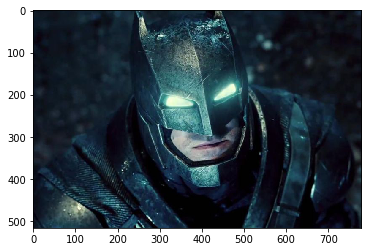

In [2]:
# using opencv would be counterproductive here
img = plt.imread('images/batman.jpg')
plt.imshow(img);

In [3]:
print("Shape of image: ", img.shape)

Shape of image:  (516, 779, 3)


## DO YOU AUGMENT? YOU WILL!

In [4]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

The functions in tf.image would ask for the image to be passed in as a tensor. They have some crucial functions like ```crop_and_resize``` , ```crop_to_bounding_box```, ```grayscale_to_rgb```, ```resize_images```. But let us focus on the implementation of the following functions that will help us understand augmentation later on.

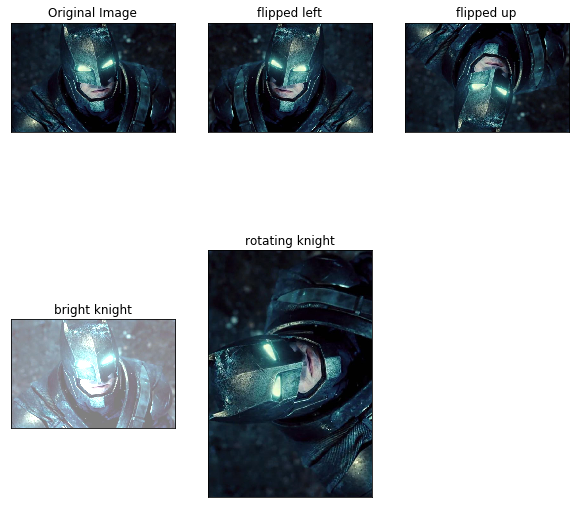

In [7]:
# converting the image to a tensor
tf_img=tf.convert_to_tensor(img)
# flipping rotating and brightening/darkening the images 
flip_img = tf.image.flip_left_right(tf_img)
flip_img_v = tf.image.flip_up_down(tf_img)
rot_img = tf.image.rot90(tf_img, k = 1)
brght_img = tf.image.adjust_brightness(tf_img, delta= 0.5)
# creating a list of the images and their labels for display
titles = ['Original Image','flipped left','flipped up','bright knight','rotating knight']
images = [img, sess.run(flip_img), sess.run(flip_img_v), sess.run(brght_img),sess.run(rot_img)]
# displaying the images
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Flipping

In [8]:
tf_img = tf.convert_to_tensor(img)

In [9]:
flip_img = tf.image.flip_left_right(tf_img)
flip_img_v = tf.image.flip_up_down(tf_img)

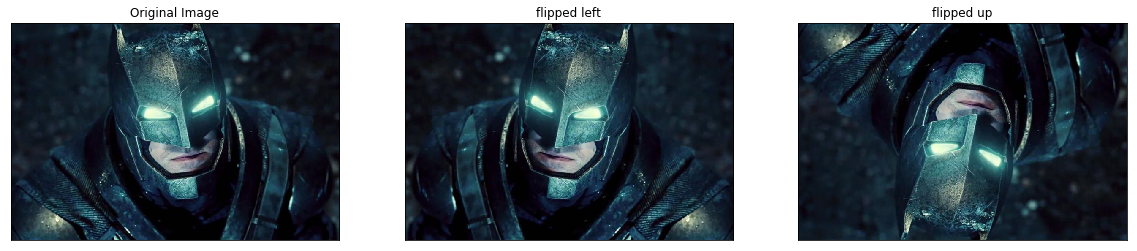

In [10]:
titles = ['Original Image', 'flipped left', 'flipped up']

images = [img, sess.run(flip_img), sess.run(flip_img_v)]

# displaying the images
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,20))
for i in range(3):
    axs[i].imshow(images[i])
    axs[i].set_title(titles[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

> Give one example where "Flipped Up" doesn't make sense.

# Rotation

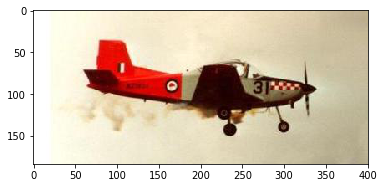

In [11]:
img = plt.imread('images/airplane.jpg')
plt.imshow(img);

In [12]:
print("Shape of image: ", img.shape)

Shape of image:  (184, 401, 3)


In [13]:
tf_img=tf.convert_to_tensor(img)

In [15]:
rotate_90 = tf.image.rot90(tf_img, k=1)
rotate_180 = tf.image.rot90(tf_img, k=2)
rotate_ang = tf.contrib.image.rotate(tf_img, angles=0.3)

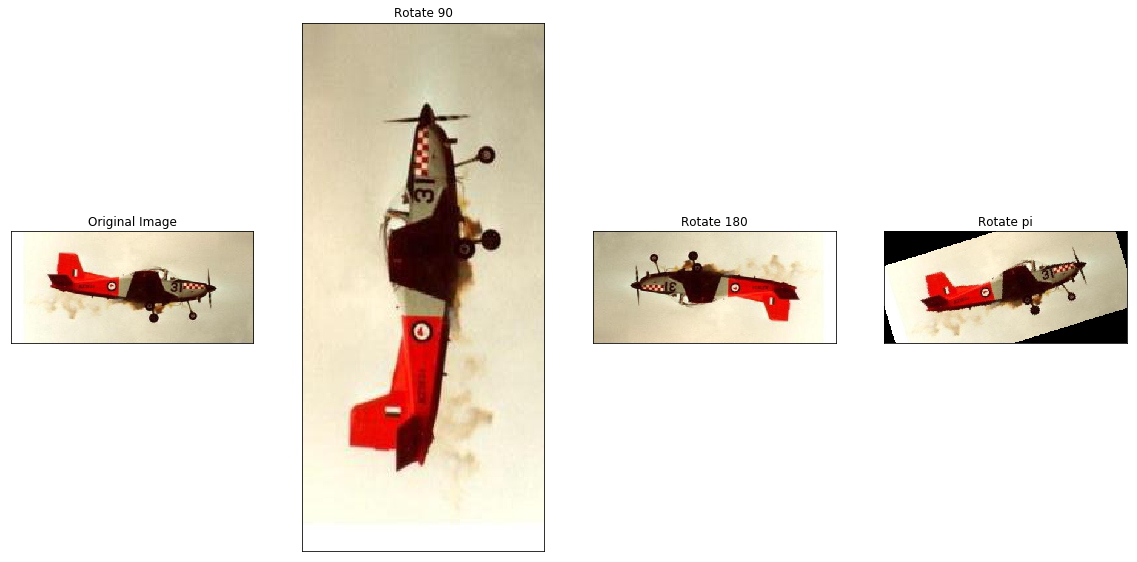

In [16]:
titles = ['Original Image', 'Rotate 90', 'Rotate 180', 'Rotate pi']

images = [img, sess.run(rotate_90), sess.run(rotate_180), sess.run(rotate_ang)]

# displaying the images
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,20))
for i in range(4):
    axs[i].imshow(images[i])
    axs[i].set_title(titles[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

## Brightness

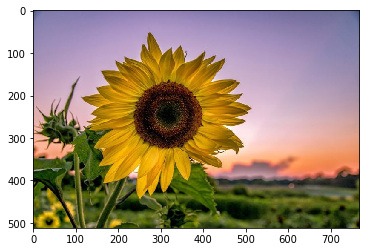

In [17]:
img = plt.imread('images/sunflower.jpg')
plt.imshow(img);

In [18]:
print("Shape of image: ", img.shape)

Shape of image:  (512, 768, 3)


In [19]:
tf_img=tf.convert_to_tensor(img)

In [20]:
brght_img_25 = tf.image.adjust_brightness(tf_img, delta= 0.25)
brght_img_50 = tf.image.adjust_brightness(tf_img, delta= 0.5)
brght_img_75 = tf.image.adjust_brightness(tf_img, delta= 0.75)
brght_img_100 = tf.image.adjust_brightness(tf_img, delta= 1.0)

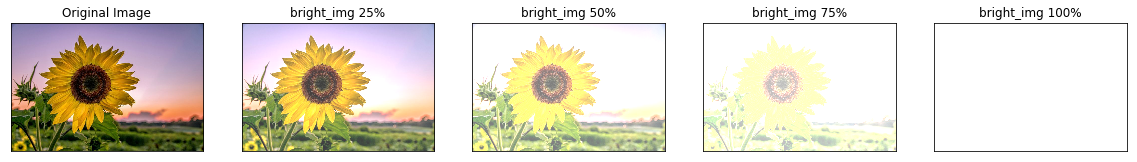

In [21]:
titles = ['Original Image', 'bright_img 25%', 'bright_img 50%', 'bright_img 75%', 'bright_img 100%']

images = [img, sess.run(brght_img_25), sess.run(brght_img_50), sess.run(brght_img_75), sess.run(brght_img_100)]

# displaying the images
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,20))
for i in range(5):
    axs[i].imshow(images[i])
    axs[i].set_title(titles[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

## Translation

## Noise

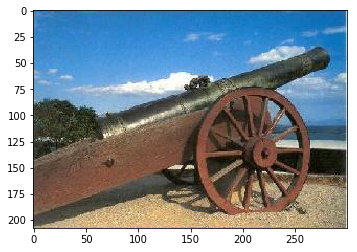

In [30]:
img = plt.imread('images/cannon.jpg')
plt.imshow(img);

In [31]:
print("Shape of image: ", img.shape)

Shape of image:  (208, 300, 3)


In [35]:
tf_img=tf.convert_to_tensor(img, dtype=tf.float32)

In [45]:
tf_img

<tf.Tensor 'Const_8:0' shape=(208, 300, 3) dtype=float32>

In [60]:
noise = tf.random_normal(shape=tf.shape(tf_img), mean=0.0, stddev=1.0,
dtype=tf.float32)
output = tf.add(tf_img, noise)

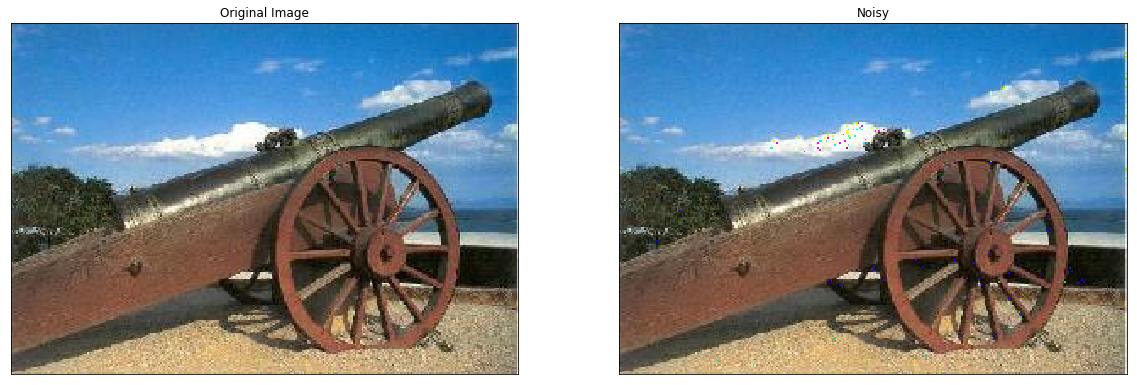

In [61]:
titles = ['Original Image', 'Noisy']

images = [img, sess.run(output)]

# displaying the images
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,20))
for i in range(2):
    axs[i].imshow(images[i].astype(np.uint8))
    axs[i].set_title(titles[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()

## Some more important functions

The ```tf.image``` module offers quite a number of fantastic functions that helps in day-to-day image processing. It is still recommended that one use ```opencv``` for tasks explicitly well suited to classical image processing. However, having said that TensorFlow does give us some gems which are quite useful in the long run.
* ```psnr1 = tf.image.psnr(image1, image2, max_val=255)```
* ``` ssim1 = tf.image.ssim(image1, image2, max_val=255, filter_size=11,filter_sigma=1.5, k1=0.01, k2=0.03)```
* ```tf.image.sobel_edges(image)```

                          

In [58]:
im1 = tf.image.convert_image_dtype(tf_img, tf.float32)
im2 = tf.image.convert_image_dtype(brght_img, tf.float32)
ssim1 = tf.image.ssim(im1, im2, max_val=255)
print(ssim1)

Tensor("Mean_2:0", shape=(), dtype=float32)


These image functions provided by TensorFlow are especially useful in Data Augmentation as we will see in a while. While it can be tempting to write your own class for the purpose of tweaking your image data, TF does provide us with a function such as ```ImageDataGenerator``` for the same.